In [89]:
import pandas as pd
import numpy as np
import os
import scipy.stats as stats

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.tree import DecisionTreeClassifier, plot_tree, export_text
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.dummy import DummyClassifier

from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

import pydataset as data

from env import host, username, password
import prepare
import acquire


In [90]:
telco_df = acquire.get_telco_data()


In [91]:
telco_df.head()

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,2,1,3,0016-QLJIS,Female,0,Yes,Yes,65,Yes,...,Yes,Yes,Yes,Yes,90.45,5957.9,No,Two year,DSL,Mailed check
1,4,1,3,0017-DINOC,Male,0,No,No,54,No,...,Yes,Yes,No,No,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,3,1,3,0019-GFNTW,Female,0,No,No,56,No,...,Yes,No,No,No,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,4,1,3,0056-EPFBG,Male,0,Yes,Yes,20,No,...,Yes,No,No,Yes,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,3,1,3,0078-XZMHT,Male,0,Yes,No,72,Yes,...,Yes,Yes,Yes,Yes,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


In [92]:
telco_df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

In [93]:
telco_df[telco_df['total_charges'] == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
85,4,1,3,1371-DWPAZ,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,No,56.05,,No,Two year,DSL,Credit card (automatic)
156,3,1,3,2775-SEFEE,Male,0,No,Yes,0,Yes,...,Yes,No,No,Yes,61.90,,No,Two year,DSL,Bank transfer (automatic)
236,2,1,3,4075-WKNIU,Female,0,Yes,Yes,0,Yes,...,Yes,Yes,No,No,73.35,,No,Two year,DSL,Mailed check
255,3,1,3,4472-LVYGI,Female,0,Yes,Yes,0,No,...,Yes,Yes,No,Yes,52.55,,No,Two year,DSL,Bank transfer (automatic)
339,2,1,3,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,...,No,Yes,Yes,No,80.85,,No,Two year,DSL,Mailed check
5681,2,3,3,2520-SGTTA,Female,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.00,,No,Two year,None,Mailed check
5717,2,3,3,3115-CZMZD,Male,0,No,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,20.25,,No,Two year,None,Mailed check
5727,2,3,3,3213-VVOLG,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.35,,No,Two year,None,Mailed check
5798,2,3,3,4367-NUYAO,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,25.75,,No,Two year,None,Mailed check
6007,2,3,3,7644-OMVMY,Male,0,Yes,Yes,0,Yes,...,No internet service,No internet service,No internet service,No,19.85,,No,Two year,None,Mailed check


In [94]:
telco_df.isnull().sum()

payment_type_id             0
internet_service_type_id    0
contract_type_id            0
customer_id                 0
gender                      0
senior_citizen              0
partner                     0
dependents                  0
tenure                      0
phone_service               0
multiple_lines              0
online_security             0
online_backup               0
device_protection           0
tech_support                0
streaming_tv                0
streaming_movies            0
paperless_billing           0
monthly_charges             0
total_charges               0
churn                       0
contract_type               0
internet_service_type       0
payment_type                0
dtype: int64

In [95]:
telco_df['total_charges'] = telco_df['total_charges'] + '0'

In [96]:
telco_df['total_charges'] = telco_df['total_charges'].astype('float')
telco_df['total_charges'].dtype

dtype('float64')

In [97]:
telco_df[telco_df['total_charges'] == ' ']

,payment_type_id,internet_service_type_id,contract_type_id,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,...,tech_support,streaming_tv,streaming_movies,paperless_billing,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type


In [98]:
telco_df.duplicated().sum()

0

In [99]:
# list the current columns
telco_df.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'gender',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'online_security',
 'online_backup',
 'device_protection',
 'tech_support',
 'streaming_tv',
 'streaming_movies',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type']

In [100]:
#use nunique to look at the obj data types
telco_df.nunique()

payment_type_id                4
internet_service_type_id       3
contract_type_id               3
customer_id                 7043
gender                         2
senior_citizen                 2
partner                        2
dependents                     2
tenure                        73
phone_service                  2
multiple_lines                 3
online_security                3
online_backup                  3
device_protection              3
tech_support                   3
streaming_tv                   3
streaming_movies               3
paperless_billing              2
monthly_charges             1585
total_charges               6531
churn                          2
contract_type                  3
internet_service_type          3
payment_type                   4
dtype: int64

In [101]:
telco_df.head().T


,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
gender,Female,Male,Female,Male,Male
senior_citizen,0,0,0,0,0
partner,Yes,No,No,Yes,Yes
dependents,Yes,No,No,Yes,No
tenure,65,54,56,20,72
phone_service,Yes,No,No,No,Yes


In [102]:
telco_df.partner = telco_df.partner.replace({'Yes': 1, 'No': 0})

In [103]:
telco_df.dependents = telco_df.dependents.replace({'Yes': 1, 'No': 0})

In [104]:
telco_df.online_security = telco_df.online_security.replace({'No internet service': 0, 'Yes': 1, 'No': 0})

In [105]:
telco_df.online_backup = telco_df.online_backup.replace({'No internet service': 0, 'Yes': 1, 'No': 0})

In [106]:
telco_df.device_protection = telco_df.device_protection.replace({'No internet service': 0, 'Yes': 1, 'No': 0})

In [107]:
telco_df.streaming_tv = telco_df.streaming_tv.replace({'No internet service': 0, 'Yes': 1, 'No': 0})

In [108]:
telco_df.streaming_movies = telco_df.streaming_movies.replace({'No internet service': 0, 'Yes': 1, 'No': 0})

In [109]:
telco_df.paperless_billing = telco_df.paperless_billing.replace({'Yes': 1, 'No': 0})

In [110]:
telco_df['online services'] = telco_df.online_security + telco_df.online_backup

In [111]:
telco_df = telco_df.drop(columns = ['online_security', 'online_backup'])

In [112]:
telco_df['streaming_services'] = telco_df.streaming_tv + telco_df.streaming_movies

In [113]:
telco_df = telco_df.drop(columns=['streaming_tv', 'streaming_movies'])

In [114]:
telco_df.gender = telco_df.gender.replace({'Male': 1, 'Female': 0})

In [115]:
telco_df.phone_service = telco_df.phone_service.replace({'Yes': 1, 'No': 0})


In [116]:
telco_df.multiple_lines = telco_df.multiple_lines.replace({'No phone service': 0, 'Yes': 1, 'No': 0})

In [174]:
telco_df.tech_support = telco_df.tech_support.replace({'No internet service': 0, 'Yes': 1, 'No': 0})

In [141]:
telco_df.churn = telco_df.churn.replace({'Yes': 1, 'No': 0})

In [142]:
telco_df.contract_type = telco_df.contract_type.replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})

In [187]:
telco_df.payment_type = telco_df.payment_type.replace({'Mailed check': 0, 'Credit card (automatic)': 1, 'Bank transfer (automatic)': 1, 'Bank transfer (automatic)': 1, 'Electronic check': 0})

In [188]:
telco_df.info

<bound method DataFrame.info of       payment_type_id  internet_service_type_id  contract_type_id customer_id  \
0                   2                         1                 3  0016-QLJIS   
1                   4                         1                 3  0017-DINOC   
2                   3                         1                 3  0019-GFNTW   
3                   4                         1                 3  0056-EPFBG   
4                   3                         1                 3  0078-XZMHT   
...               ...                       ...               ...         ...   
7038                2                         3                 1  9962-BFPDU   
7039                2                         3                 1  9967-ATRFS   
7040                4                         3                 1  9970-QBCDA   
7041                2                         3                 1  9975-SKRNR   
7042                3                         3                 1  9986-BONCE

In [162]:
telco_df.head().T

,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
senior_citizen,0,0,0,0,0
partner,1,0,0,1,1
dependents,1,0,0,1,0
tenure,65,54,56,20,72
phone_service,1,0,0,0,1
multiple_lines,1,0,0,0,1


In [163]:
telco_df.senior_citizen

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    0
Name: senior_citizen, Length: 7043, dtype: int64

Text(0.5, 0, 'Tenure (in months)')

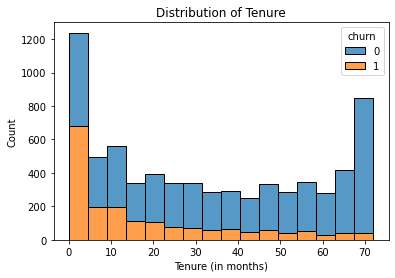

In [164]:
sns.histplot(telco_df,
             x=telco_df.tenure,
             hue='churn',
             multiple='stack')

plt.title("Distribution of Tenure")
plt.xlabel('Tenure (in months)')

# plt.xlim(0, telco_df.tenure.max());

(18.25, 118.75)

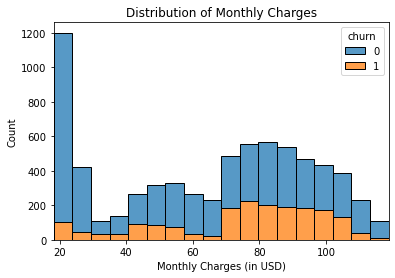

In [165]:
sns.histplot(data=telco_df,
            x=telco_df.monthly_charges,
            hue=telco_df.churn,
            multiple='stack')

plt.title("Distribution of Monthly Charges")
plt.xlabel('Monthly Charges (in USD)')

plt.xlim(telco_df.monthly_charges.min(),
         telco_df.monthly_charges.max())

# plt.xticks(np.linspace(18, 120, 24));

In [166]:
telco_df.churn

0       0
1       0
2       0
3       0
4       0
       ..
7038    0
7039    0
7040    0
7041    0
7042    1
Name: churn, Length: 7043, dtype: int64

In [167]:
# telco_df['churn'] = (telco_df['churn'] == 'Yes').astype(int)

In [168]:
df_dummies = pd.get_dummies(telco_df.gender, drop_first=True)

AttributeError: 'DataFrame' object has no attribute 'gender'

In [169]:
telco_df = pd.concat([telco_df, df_dummies],axis=1)

    # Drop the column, we do not need the string version of gender
telco_df = telco_df.drop('gender', axis=1)
print('Dummy variables for gender created as "male".')

KeyError: "['gender'] not found in axis"

In [189]:
telco_df.head().T


,0,1,2,3,4
payment_type_id,2,4,3,4,3
internet_service_type_id,1,1,1,1,1
contract_type_id,3,3,3,3,3
customer_id,0016-QLJIS,0017-DINOC,0019-GFNTW,0056-EPFBG,0078-XZMHT
senior_citizen,0,0,0,0,0
partner,1,0,0,1,1
dependents,1,0,0,1,0
tenure,65,54,56,20,72
phone_service,1,0,0,0,1
multiple_lines,1,0,0,0,1


In [190]:
telco_df.columns.to_list()

['payment_type_id',
 'internet_service_type_id',
 'contract_type_id',
 'customer_id',
 'senior_citizen',
 'partner',
 'dependents',
 'tenure',
 'phone_service',
 'multiple_lines',
 'device_protection',
 'tech_support',
 'paperless_billing',
 'monthly_charges',
 'total_charges',
 'churn',
 'contract_type',
 'internet_service_type',
 'payment_type',
 'online services',
 'streaming_services',
 1,
 1]

In [191]:
telco_df2 = telco_df.drop(columns=['payment_type_id', 'internet_service_type', 'contract_type_id', 'customer_id'])

In [192]:
telco_df2.info

<bound method DataFrame.info of       internet_service_type_id  senior_citizen  partner  dependents  tenure  \
0                            1               0        1           1      65   
1                            1               0        0           0      54   
2                            1               0        0           0      56   
3                            1               0        1           1      20   
4                            1               0        1           0      72   
...                        ...             ...      ...         ...     ...   
7038                         3               0        1           1       1   
7039                         3               0        0           0      19   
7040                         3               0        0           0       6   
7041                         3               0        0           0       1   
7042                         3               0        0           0       4   

      phone_service

In [193]:
# prepare the data
train_validate, test = train_test_split(telco_df2,
                                            test_size=.2,
                                            random_state=123,
                                            stratify=telco_df.churn
                                            )
    
train, validate = train_test_split(train_validate,
                                       test_size=.3,
                                       random_state=123,
                                       stratify=train_validate.churn)


In [194]:
train.shape

(3943, 19)

In [195]:

X_train, y_train = train.drop(columns='churn'), train['churn']
X_validate, y_validate = validate.drop(columns='churn'), validate['churn']
X_test, y_test = test.drop(columns='churn'), test['churn']

In [196]:
train.churn.value_counts(), train.churn.value_counts(normalize=True)

(0    2897
 1    1046
 Name: churn, dtype: int64,
 0    0.73472
 1    0.26528
 Name: churn, dtype: float64)

In [197]:
baseline = DummyClassifier(strategy='constant', constant=0)
baseline.fit(X_train, y_train)
print('Baseline accuracy: %.4f' % baseline.score(X_train, y_train))

Baseline accuracy: 0.7347


In [204]:
dt1 = DecisionTreeClassifier(max_depth=4, random_state=123)
dt1.fit(X_train, y_train)
dt1.score(X_train,y_train)

0.789753994420492

In [140]:
telco_df2.head().T

,0,1,2,3,4
internet_service_type_id,1,1,1,1,1
senior_citizen,0,0,0,0,0
partner,1,0,0,1,1
dependents,1,0,0,1,0
tenure,65,54,56,20,72
phone_service,1,0,0,0,1
multiple_lines,1,0,0,0,1
device_protection,1,0,1,1,1
tech_support,1,1,1,1,1
paperless_billing,1,0,0,1,1


In [199]:
logit = LogisticRegression(C=1, random_state=123)

In [200]:

logit.fit(X_train, y_train)

LogisticRegression(C=1, random_state=123)

In [202]:

y_pred = logit.predict(X_train)

In [210]:
print('\nAccuracy of logit classifier on training set:',logit.score(X_train, y_train))


Accuracy of logit classifier on training set: 0.8021810803956378


In [203]:
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      2897
           1       0.65      0.56      0.60      1046

    accuracy                           0.80      3943
   macro avg       0.75      0.72      0.73      3943
weighted avg       0.79      0.80      0.80      3943



In [212]:
train.corr()


,internet_service_type_id,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,device_protection,tech_support,paperless_billing,monthly_charges,total_charges,churn,contract_type,payment_type,online services,streaming_services,1,1
internet_service_type_id,1.000000,-0.028488,0.009531,0.048644,-0.042404,0.391954,0.019317,-0.315684,-0.392532,-0.139070,-0.312810,-0.076875,-0.043897,0.087600,-0.042141,-0.444298,-0.271091,0.000032,0.000032
senior_citizen,-0.028488,1.000000,0.021704,-0.201859,0.007666,0.017884,0.137272,0.054971,-0.075292,0.170268,0.230111,0.033500,0.165482,-0.162383,-0.023511,0.009155,0.134006,0.007243,0.007243
partner,0.009531,0.021704,1.000000,0.463617,0.366470,0.041129,0.155811,0.140242,0.100511,-0.028135,0.096066,0.132626,-0.137696,0.284303,0.149661,0.174967,0.124095,-0.014710,-0.014710
dependents,0.048644,-0.201859,0.463617,1.000000,0.160178,0.000945,-0.013628,0.013517,0.071267,-0.114746,-0.117644,0.032951,-0.160315,0.250273,0.102038,0.075834,-0.049786,-0.007656,-0.007656
tenure,-0.042404,0.007666,0.366470,0.160178,1.000000,0.006187,0.325379,0.349927,0.328066,-0.006974,0.250854,0.381461,-0.352282,0.660485,0.392603,0.433219,0.314387,0.004282,0.004282
phone_service,0.391954,0.017884,0.041129,0.000945,0.006187,1.000000,0.284602,-0.069898,-0.096026,0.021742,0.255629,0.043087,0.011995,-0.002429,-0.007627,-0.082473,-0.027634,-0.009084,-0.009084
multiple_lines,0.019317,0.137272,0.155811,-0.013628,0.325379,0.284602,1.000000,0.201066,0.106113,0.172271,0.501330,0.215692,0.041917,0.101511,0.116511,0.196063,0.294829,-0.006712,-0.006712
device_protection,-0.315684,0.054971,0.140242,0.013517,0.349927,-0.069898,0.201066,1.000000,0.342797,0.100626,0.481129,0.262711,-0.063270,0.216590,0.167897,0.371675,0.442158,-0.007760,-0.007760
tech_support,-0.392532,-0.075292,0.100511,0.071267,0.328066,-0.096026,0.106113,0.342797,1.000000,0.039535,0.341569,0.184237,-0.176822,0.302377,0.176395,0.403070,0.322459,-0.019327,-0.019327
paperless_billing,-0.139070,0.170268,-0.028135,-0.114746,-0.006974,0.021742,0.172271,0.100626,0.039535,1.000000,0.344421,0.087122,0.187409,-0.191500,-0.029346,0.076940,0.238566,-0.012850,-0.012850


In [205]:
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [206]:

knn.fit(X_train, y_train)

KNeighborsClassifier()

In [207]:
for k in range(1, 13):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    accuracy = knn.score(X_test, y_test)
    print(f'{k:2d}: {accuracy:.2%}')

 1: 72.32%
 2: 76.44%
 3: 75.87%
 4: 77.64%
 5: 76.22%
 6: 77.71%
 7: 76.93%
 8: 77.64%
 9: 76.65%
10: 77.79%
11: 77.93%
12: 77.79%


In [209]:
for k in range(1, 15):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    print(f'Model: {k} when k is {k}')
    print(f'training score: {knn.score(X_train, y_train):.2%}')
    print(f'validate score: {knn.score(X_validate, y_validate):.2%}')
    print('__________________________________________________________')

Model: 1 when k is 1
training score: 99.80%
validate score: 70.37%
__________________________________________________________
Model: 2 when k is 2
training score: 85.54%
validate score: 74.99%
__________________________________________________________
Model: 3 when k is 3
training score: 85.27%
validate score: 73.86%
__________________________________________________________
Model: 4 when k is 4
training score: 82.78%
validate score: 76.35%
__________________________________________________________
Model: 5 when k is 5
training score: 83.13%
validate score: 75.46%
__________________________________________________________
Model: 6 when k is 6
training score: 82.15%
validate score: 77.29%
__________________________________________________________
Model: 7 when k is 7
training score: 82.15%
validate score: 76.58%
__________________________________________________________
Model: 8 when k is 8
training score: 81.77%
validate score: 77.29%
___________________________________________________

In [214]:
X_train.head().T


,5642,3338,4273,2382,2655
internet_service_type_id,3.00,2.00,2.00,1.0,2.00
senior_citizen,0.00,0.00,1.00,0.0,0.00
partner,1.00,0.00,0.00,1.0,0.00
dependents,1.00,0.00,0.00,0.0,0.00
tenure,23.00,27.00,7.00,47.0,41.00
phone_service,1.00,1.00,1.00,1.0,1.00
multiple_lines,1.00,1.00,0.00,0.0,0.00
device_protection,0.00,1.00,0.00,0.0,0.00
tech_support,0.00,0.00,0.00,0.0,1.00
paperless_billing,1.00,1.00,1.00,1.0,1.00


Does a customer churn independent of whether they have a month-to-month contract or other types of contracts?

\$H_{O}$ Churn is independent of whether they have a month-to-month contract or other types of contracts.

\$H_{a}$ Churn is dependent on whether they have a month-to-month contract or other types of contracts.

In [222]:
type_of_contract = np.where((X_train['contract_type']==0), 1, 0)

In [224]:
result1 = pd.crosstab(type_of_contract, y_train)
result1 = result1.rename(index={0:'Year/Year +', 1: 'Month-to-Month'}, columns={0:'No Churn', 1:'Churn'})
result1.index.name=''
result1.columns.name=''

In [227]:
result1

,No Churn,Churn
,,
Year/Year +,1663,118
Month-to-Month,1234,928


In [229]:
alpha = 0.05

In [230]:
chi2, p, degf, expected = stats.chi2_contingency(result1)

print(("chi2: {:.2f}\nP-Value: {:.2f}\nalpha: {:.2f}\n").format(chi2, p, alpha))


chi2: 658.26
P-Value: 0.00
alpha: 0.05



In [231]:
if p < 0.05:
    print(f' p is less than our alpha and we can reject the null hypothesis')

 p is less than our alpha and we can reject the null hypothesis
